In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from tqdm import tqdm
%matplotlib inline

In [5]:
data = pd.read_csv('./ds-boot-1.csv', sep='\t')

In [9]:
x = np.array(data.day)
y = np.array(data.cummBugs)

In [147]:
def predict(a,b,x):
    return a * (1 - (1 + b * x) * np.exp(-b * x))
#     return a * np.power(b, np.power(c, x))

In [150]:
def estimate(X, Y):
    def loss(coefs):
        return np.mean((predict(coefs[0],coefs[1], X) - Y) ** 2)
    return minimize(loss,  [5000., 0.001], tol=1e-25).x

In [151]:
coefs = estimate(x,y)
coefs

array([  8.54123045e+03,   1.85850121e-03])

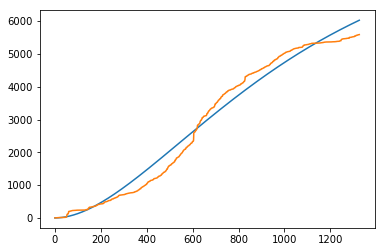

In [153]:
plt.plot(predict(coefs[0], coefs[1], x))
plt.plot(y)

Bootstrap estimations:

In [165]:
exp_len = 900
B = 1000
bs_coefs = []
for _ in tqdm(range(B)):
    samp_len = np.random.geometric(1.0/(exp_len + 1.0))
    if samp_len >= len(data):
        samp_len = len(data) - 1
    start_ind = np.random.randint(0, len(data) - samp_len)
    samp_ind = np.array(range(start_ind, start_ind + samp_len))
    x_bs = x[samp_ind]
    y_bs = y[samp_ind]
    bs_coefs.append(estimate(x_bs,y_bs))
bs_coefs = np.array(bs_coefs)

 59%|█████▉    | 592/1000 [00:12<00:08, 46.04it/s]/home/sergey/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/sergey/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
/home/sergey/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
100%|██████████| 1000/1000 [00:21<00:00, 46.48it/s]


In [166]:
deltas = coefs - bs_coefs
deltas_l = np.percentile(deltas, 2.5,axis = 0)
deltas_r = np.percentile(deltas, 97.5,axis = 0)
l_bound = coefs - deltas_r
r_bound = coefs - deltas_l

In [167]:
pd.DataFrame([{'est': coefs[i],
     'l': l_bound[i],
     'r': r_bound[i]} for i in range(2)])

,est,l,r
0,8541.230455,802.466984,1.888489e+06
1,0.001859,0.000087,1.012195e+00
